In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-minrescg-converge)

We will compare MINRES and CG on some quasi-random SPD problems.  The first matrix has a condition number of 100.

In [2]:
n = 5000;
density = 0.001;
A = sprandsym(n, density, 1e-2, 2);

We generate a system with a known solution.

In [3]:
x = (1:n)' / n;
b = A * x;

```{index} ! MATLAB; pcg
```

Now we apply both methods and compare the convergence of the system residuals.

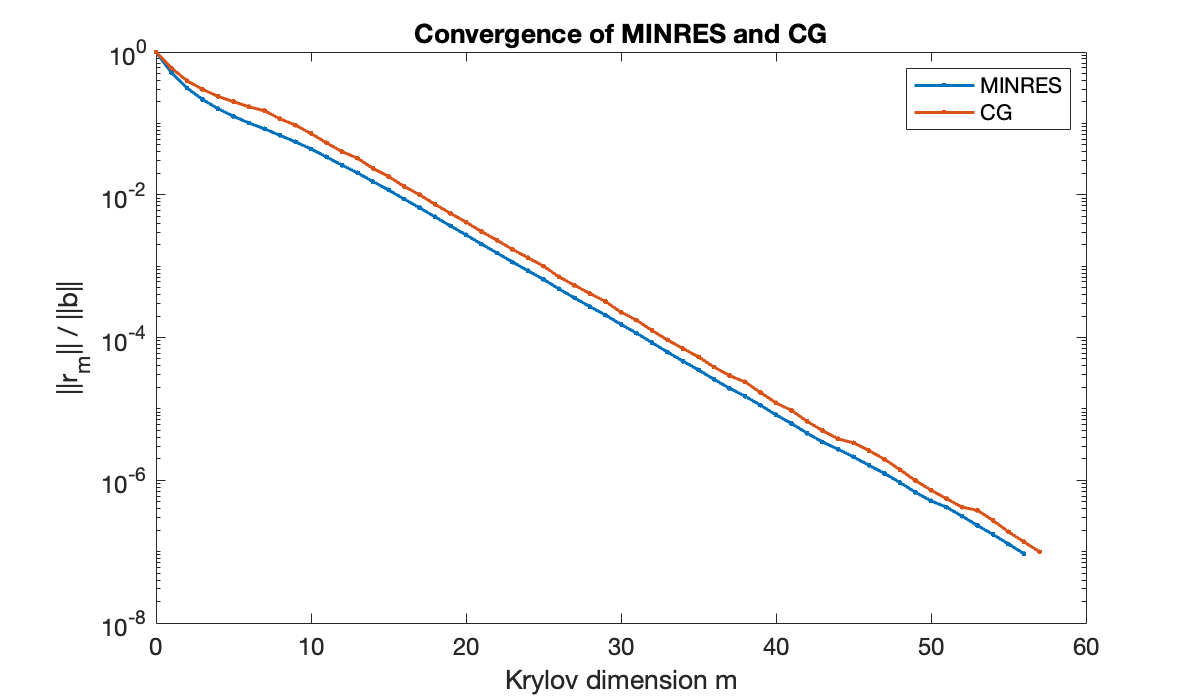

In [4]:
[xMR, ~, ~, ~, residMR] = minres(A, b, 1e-7, 100);
[xCG, ~, ~, ~, residCG] = pcg(A, b, 1e-7, 100);
M = length(residMR) - 1;
clf,  semilogy(0:M, residMR / norm(b), '.-')
M = length(residCG) - 1;
hold on,  semilogy(0:M, residCG / norm(b), '.-')
title('Convergence of MINRES and CG')
xlabel('Krylov dimension m')
ylabel('||r_m|| / ||b||')
legend('MINRES', 'CG');

There is little difference between the two methods here. Next, we increase the condition number of the matrix by a factor of 25. The rule of thumb predicts that the number of iterations required should increase by a factor of about 5.

In [5]:
A = sprandsym(n, density, 1e-2 / 25, 2);
b = A * x;

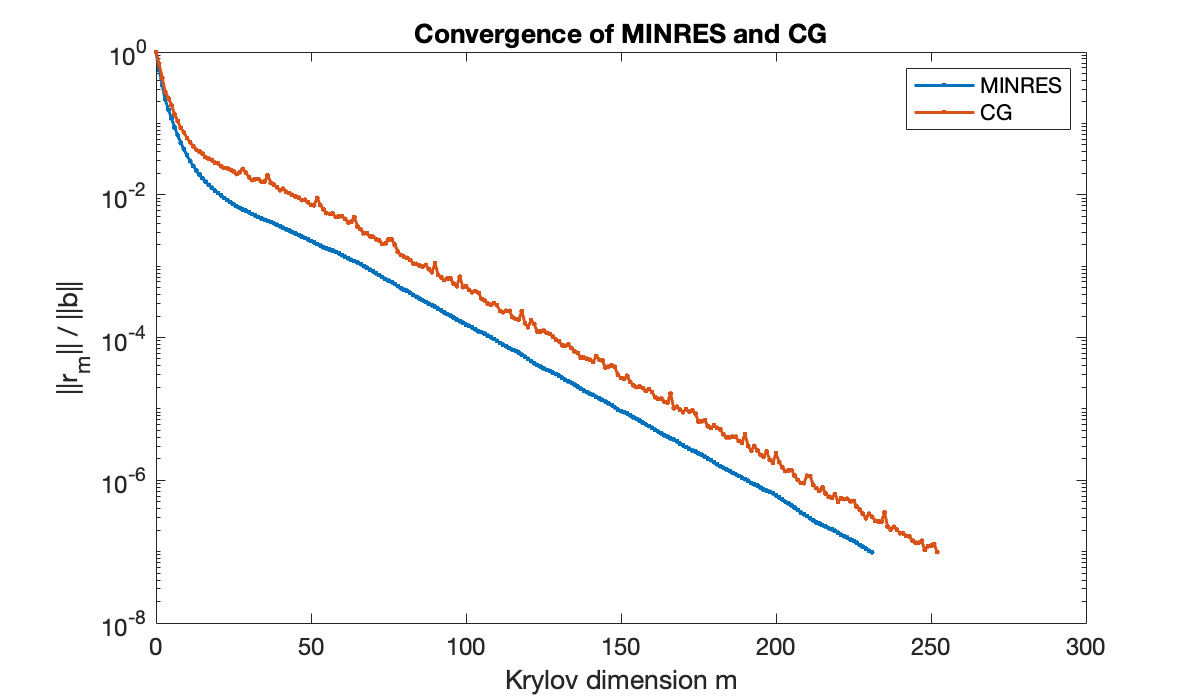

In [6]:
[xMR, ~, ~, ~, residMR] = minres(A, b, 1e-7, 400);
[xCG, ~, ~, ~, residCG] = pcg(A, b, 1e-7, 400);
M = length(residMR) - 1;
clf,  semilogy(0:M, residMR / norm(b), '.-')
M = length(residCG) - 1;
hold on,  semilogy(0:M, residCG / norm(b), '.-')
title('Convergence of MINRES and CG')
xlabel('Krylov dimension m')
ylabel('||r_m|| / ||b||')
legend('MINRES', 'CG');

Both methods have an early superlinear phase that allow them to finish slightly sooner than the factor of 5 predicted: {numref}`Theorem {number} <theorem-minrescg-converge>` is an upper bound, not necessarily an approximation. Both methods ultimately achieve the same reduction in the residual; MINRES stops earlier, but with a slightly larger error.